In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from utils import *
import os

# Set seaborn style for better visuals
sns.set(style='whitegrid')

### GMM Logic:

In [2]:
# Function to run GMM and evaluate + visualize results, calling methods from utils.py
def run_gmm(X, y_true, n_components, covariance_type='full', title=''):
    # Standardize features
    X_scaled = StandardScaler().fit_transform(X)
    
    # Run GMM
    gmm = GaussianMixture(n_components=n_components,
                          covariance_type=covariance_type,
                          random_state=42)
    gmm.fit(X_scaled)
    y_pred = gmm.predict(X_scaled)

    # Number of clusters
    n_clusters = n_components
    
    # Visualization
    if X_scaled.shape[1] == 2:
        visualize_clustering_2D(X_scaled, y_pred, y_true, title=title)
    elif X_scaled.shape[1] >= 3:
        visualize_clustering_3D(X_scaled, y_pred, y_true, title=title)
    else:
        print("Data has less than 2 dimensions; cannot visualise")

    print(f"Number of clusters set: {n_clusters}")
    print("---------------------------------------------")

    # Evaluation Metrics
    evaluate_clustering(X_scaled, y_pred, y_true, n_clusters, title=title)


### Setup datasets and hyperparameters:

In [10]:
# Directory containing datasets
dataset_dir = 'datasets'

# List of dataset filenames and parameters
datasets = [
    {
        'filename': 'isotropic_blobs.csv',
        'title': 'Isotropic Gaussian Blobs',
        'n_components': 3,
        'covariance_type': 'full'
    },
    {
        'filename': 'anisotropic_blobs.csv',
        'title': 'Anisotropic Gaussian Blobs',
        'n_components': 3,
        'covariance_type': 'full'
    },
    {
        'filename': 'moons_circles.csv',
        'title': 'Moons and Circles',
        'n_components': 4,
        'covariance_type': 'diag'
    },
    {
        'filename': 'overlapping_clusters.csv',
        'title': 'Overlapping Clusters',
        'n_components': 3,
        'covariance_type': 'spherical'
    },
    {
        'filename': 'high_dimensional_data.csv',
        'title': 'High-Dimensional Data with Noise',
        'n_components': 5,
        'covariance_type': 'diag'
    },
]

### Main Driver Code:


Processing Isotropic Gaussian Blobs...


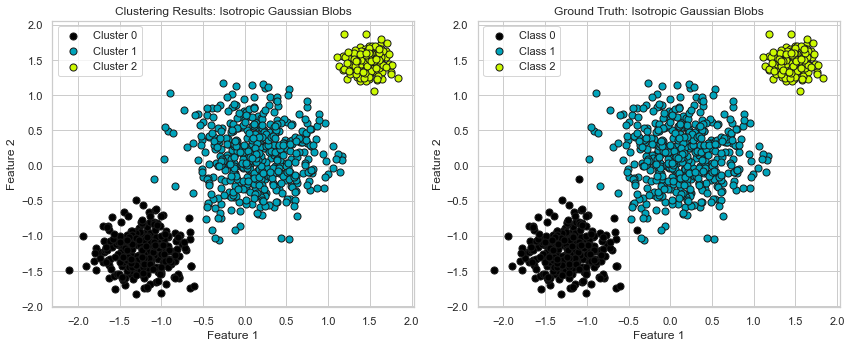

Number of clusters set: 3
---------------------------------------------
Isotropic Gaussian Blobs
Adjusted Mutual Information: 0.9878
V-measure: 0.9878

Processing Anisotropic Gaussian Blobs...


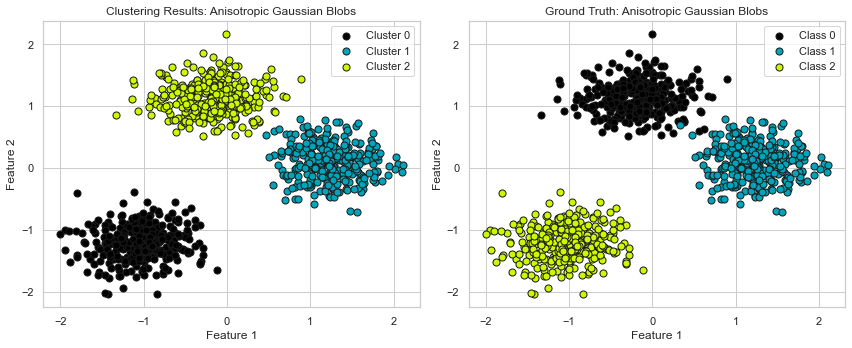

Number of clusters set: 3
---------------------------------------------
Anisotropic Gaussian Blobs
Adjusted Mutual Information: 0.9826
V-measure: 0.9827

Processing Moons and Circles...


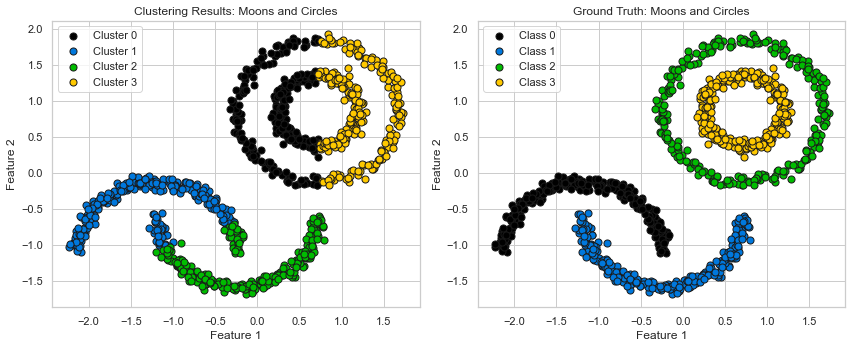

Number of clusters set: 4
---------------------------------------------
Moons and Circles
Adjusted Mutual Information: 0.6041
V-measure: 0.6054

Processing Overlapping Clusters...


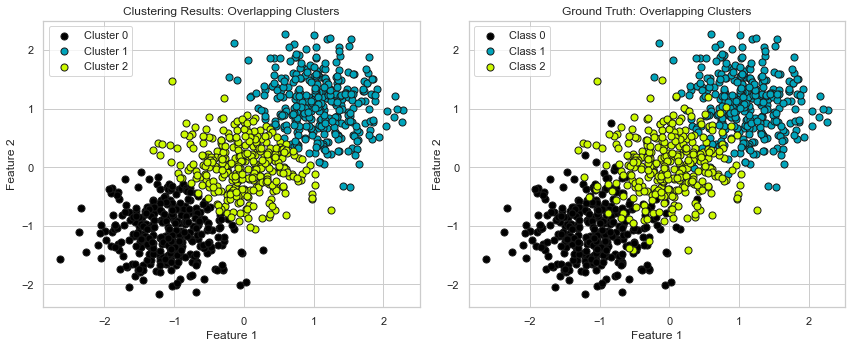

Number of clusters set: 3
---------------------------------------------
Overlapping Clusters
Adjusted Mutual Information: 0.7367
V-measure: 0.7372

Processing High-Dimensional Data with Noise...
Data has been reduced to 3D using PCA for visualization.


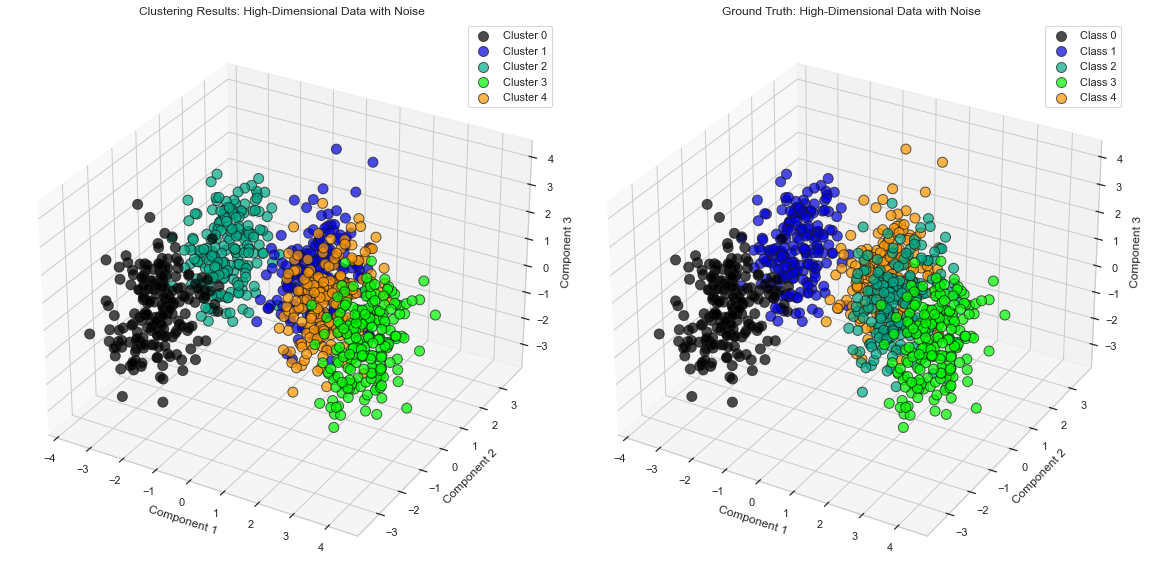

Number of clusters set: 5
---------------------------------------------
High-Dimensional Data with Noise
Adjusted Mutual Information: 1.0000
V-measure: 1.0000


In [11]:
# Run GMM on each dataset
for data_info in datasets:
    print(f"\nProcessing {data_info['title']}...")
    filepath = os.path.join(dataset_dir, data_info['filename'])
    X, y_true = load_dataset(filepath)
    run_gmm(X, y_true,
            n_components=data_info['n_components'],
            covariance_type=data_info['covariance_type'],
            title=data_info['title'])

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_mutual_info_score
from utils import evaluate_clustering

# Your dataset loading function
filepath = os.path.join(dataset_dir, data_info['filename'])
X, y_true = load_dataset(filepath)

# Scale the features for GMM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the covariance types to iterate over
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Dictionary to store the results for each covariance type
results = {}

# Loop through each dataset
for data_info in datasets:

    
    # Load dataset
    filepath = os.path.join(dataset_dir, data_info['filename'])
    X, y_true = load_dataset(filepath)
    
    # Scale the features for GMM
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Dictionary to store the results for each covariance type
    results = {}

    # Loop through the different covariance types
    for cov_type in covariance_types:
        # Initialize the GMM model
        gmm = GaussianMixture(n_components=data_info['n_components'], covariance_type=cov_type, random_state=42)
        
        # Fit the GMM model
        gmm.fit(X_scaled)
        
        # Predict the cluster labels
        labels = gmm.predict(X_scaled)
        
        # Evaluate the clustering with AMI
        ami = adjusted_mutual_info_score(y_true, labels)
        
        # Store the AMI result for this covariance type
        results[cov_type] = ami
        
        # Optionally, visualize the clustering (2D or 3D)
        # visualize_clustering_2D(X_scaled, labels, y_true, title=f'GMM with {cov_type} covariance')
        # visualize_clustering_3D(X_scaled, labels, y_true, title=f'GMM with {cov_type} covariance')
        

    
    # Display all results for the current dataset
    print(f"\nAMI Scores for {data_info['title']}:")
    for cov_type, ami_score in results.items():
        print(f"{cov_type.capitalize()} Covariance: AMI = {ami_score:.4f}")


AMI Scores for Isotropic Gaussian Blobs:
Full Covariance: AMI = 0.9878
Tied Covariance: AMI = 0.9783
Diag Covariance: AMI = 0.9878
Spherical Covariance: AMI = 0.9878

AMI Scores for Anisotropic Gaussian Blobs:
Full Covariance: AMI = 0.9826
Tied Covariance: AMI = 0.9826
Diag Covariance: AMI = 0.9826
Spherical Covariance: AMI = 0.9777

AMI Scores for Moons and Circles:
Full Covariance: AMI = 0.5933
Tied Covariance: AMI = 0.5925
Diag Covariance: AMI = 0.6041
Spherical Covariance: AMI = 0.5492

AMI Scores for Overlapping Clusters:
Full Covariance: AMI = 0.7258
Tied Covariance: AMI = 0.7283
Diag Covariance: AMI = 0.7344
Spherical Covariance: AMI = 0.7367

AMI Scores for High-Dimensional Data with Noise:
Full Covariance: AMI = 0.9921
Tied Covariance: AMI = 1.0000
Diag Covariance: AMI = 1.0000
Spherical Covariance: AMI = 0.9863
